In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import io
import time
import scipy
from scipy.ndimage import convolve
from scipy import ndimage
import getBayer

In [26]:
def saveIm(Im, filename):
    Im = Im*255
    img = Image.fromarray(Im.astype(np.uint8))
    img.save(filename)
    

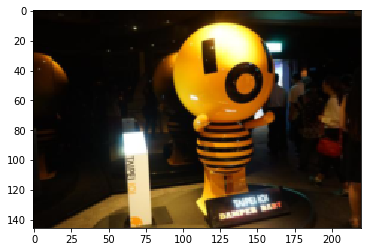

In [29]:
filename = "damper-baby.jpg"
im_orig = getBayer.get_rgb_array(filename)
im_orig = scipy.misc.imresize(im_orig, .4)
plt.imshow(im_orig/255)

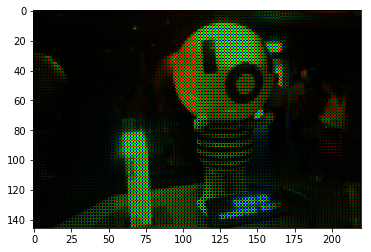

In [32]:

bayer_grid = getBayer.get_bayer_grid(im_orig.shape[1], im_orig.shape[0])
im_bayered = im_orig * bayer_grid
im_bayered = im_bayered/255
plt.imshow(im_bayered)


saveIm(im_bayered, "ex_bayered.png")

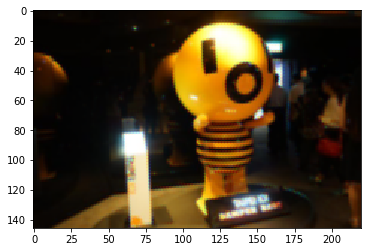

In [33]:
# im_nearest_neighbor = getBayer.debayer_nearest_neighbor(im_bayered)
# this is angry

im_bilinear = getBayer.debayerize(im_bayered)
im_malvar = getBayer.debayer_malvar(im_bayered)

plt.imshow(im_bilinear)
saveIm(im_bilinear, "bilinear_interp.png")

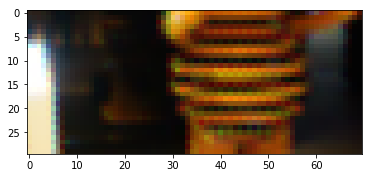

In [6]:
h,w = im_orig[:,:,0].shape
plt.imshow(im_bilinear[h//2:h//2 +30,w//2-30:w//2 +40,:])

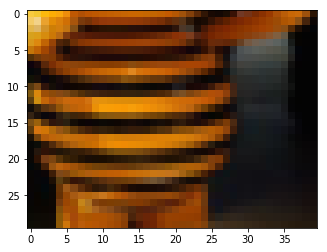

In [7]:
plt.imshow(im_orig[h//2:h//2 +30,w//2:w//2 +40,:])

1.3325980392156862

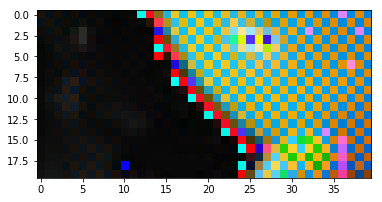

In [34]:

plt.imshow(im_malvar[h//2:h//2 +20,w//2:w//2 +40,:])
np.max(im_malvar)


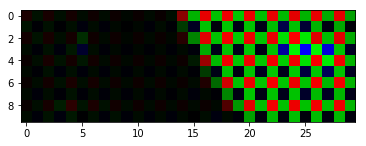

In [35]:
plt.imshow(im_bayered[h//2:h//2 +10,w//2:w//2 +30,:])

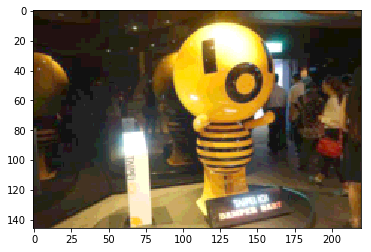

In [36]:
im_gamma = im_orig.copy()
im_gamma[:,:,0] = np.power(im_gamma[:,:,0], .5)
im_gamma[:,:,1] = np.power(im_gamma[:,:,1], .5)
im_gamma[:,:,2] = np.power(im_gamma[:,:,2], .5)
norm_gamma = np.max(im_gamma)
im_gamma = im_gamma/norm_gamma
plt.imshow(im_gamma)

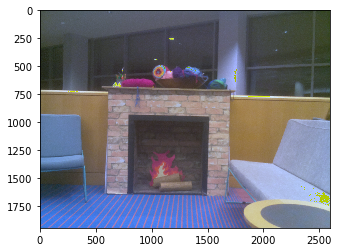

In [37]:
filename2 = "pic2.jpeg"
im_white = getBayer.get_rgb_array(filename2)
im_white = im_white/255
im_white_balance = getBayer.white_balance_gray_world(im_white)
plt.imshow(im_white_balance)

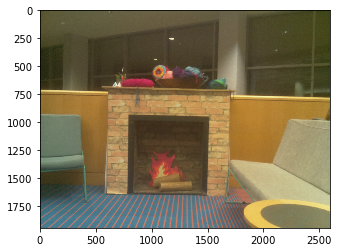

In [38]:
plt.imshow(im_white)